<a href="https://colab.research.google.com/github/torinunim/practice/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8B%9C%EA%B0%81%ED%99%94%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

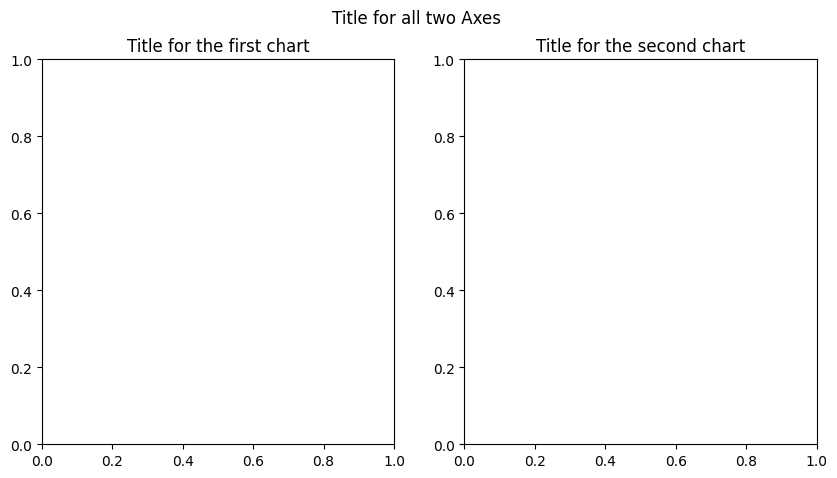

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Title for all two Axes')
ax[0].set_title('Title for the first chart')
ax[1].set_title('Title for the second chart')
plt.show()

Text(0.5, 1.0, 'without linear regression line')

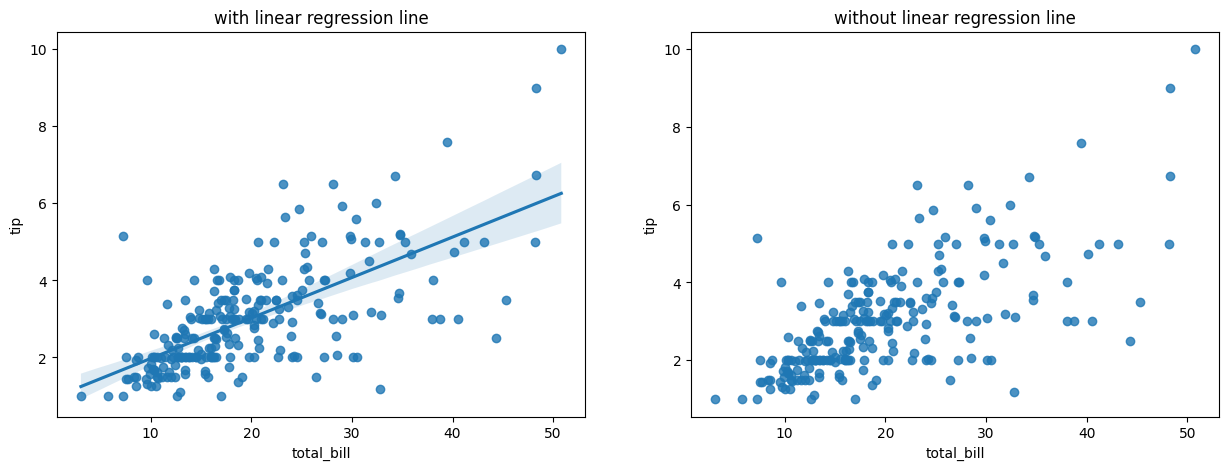

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

sns.regplot(x = 'total_bill', y = 'tip', data = tips,
            ax = ax[0], fit_reg = True)
ax[0].set_title('with linear regression line')

sns.regplot(x = 'total_bill', y = 'tip', data = tips,
            ax = ax[1], fit_reg = False)
ax[1].set_title('without linear regression line')


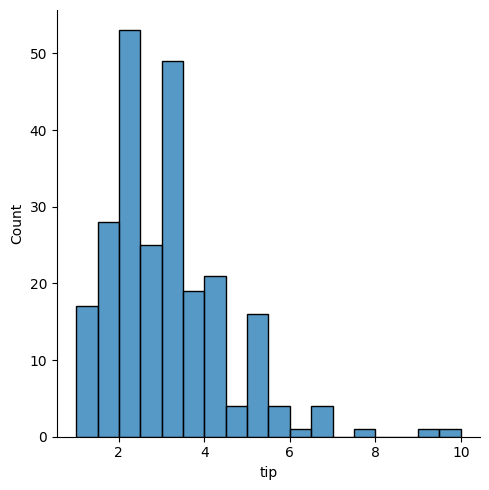

In [ ]:
tips = sns.load_dataset('tips')
sns.displot(x = 'tip', data = tips)

In [ ]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
tip_counts = tips['tip'].value_counts() #  tips의 tip 빈도수 새기
print(tip_counts)

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64


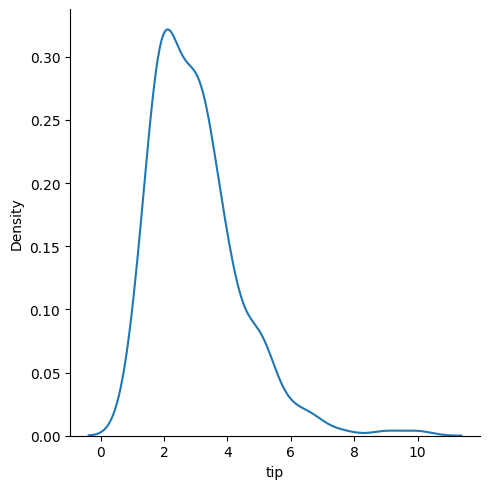

In [ ]:
# 커널 밀도 그래프 kind = 'kde'
sns.displot(x = 'tip', kind = 'kde', data = tips)
plt.show()

# 커널 밀도 그래프는 y축이 비율로 표시됨

<Axes: xlabel='day', ylabel='total_bill'>

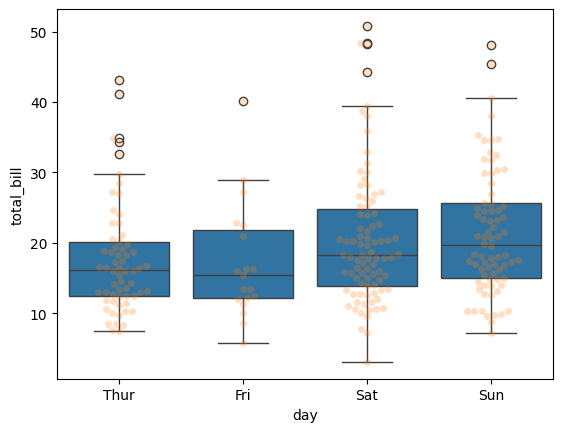

In [ ]:
# 박스플롯
sns.boxplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, alpha = 0.25)  # swarmplot 이용해서 데이터 분포 확인 가능

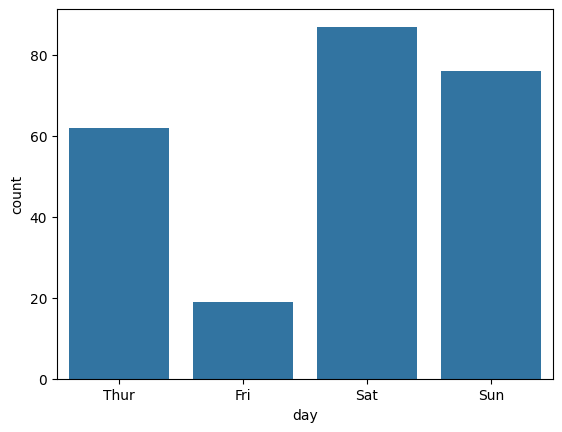

In [ ]:
# 막대그래프
sns.countplot(x = 'day', data = tips)
plt.show()

In [ ]:
# value_counts() 문자열 함수의 빈도수 내림차순으로 출력
print(tips['day'].value_counts())
print(tips['day'].value_counts().index)
print(tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
[87 76 62 19]


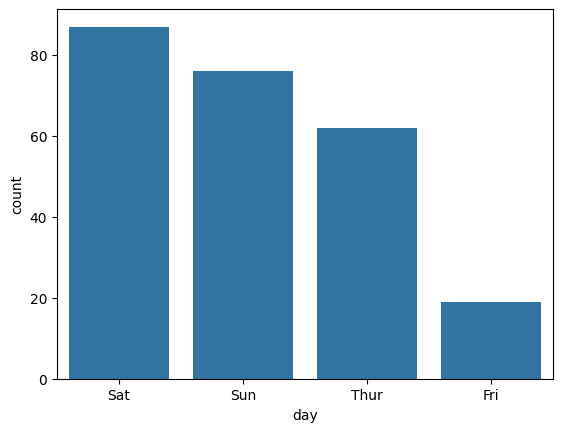

In [ ]:
sns.countplot(x = 'day', data = tips, order =tips['day'].value_counts().index) # 빈도수를 내림차순으로
plt.show()

(-5.0, 100.0)

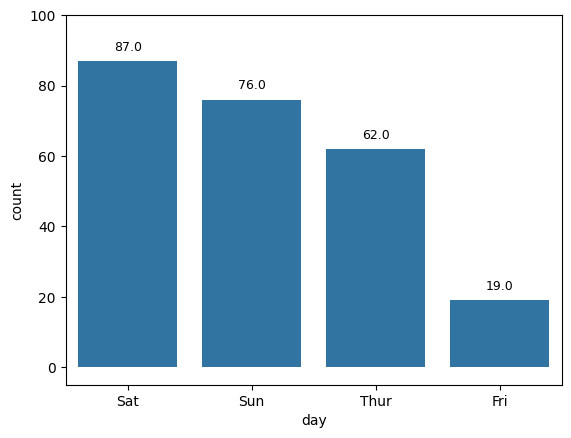

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x = 'day', data = tips, order =tips['day'].value_counts().index)
#각각의 막대에 작업
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 100)


(-5.0, 100.0)

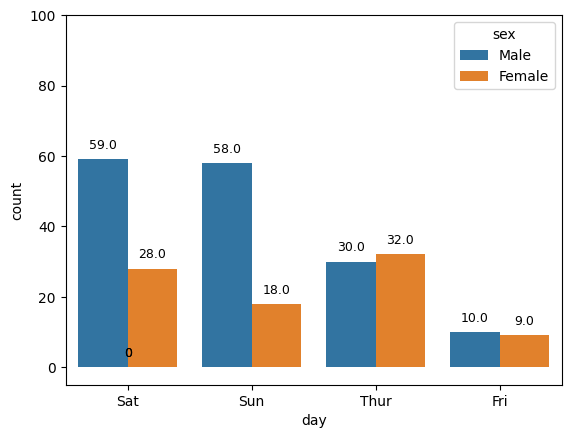

In [ ]:
# Hue 옵션 추가해 그룹 간 비교
ax = sns.countplot(x = 'day', data = tips, hue = 'sex', dodge = True, order =tips['day'].value_counts().index)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 100)

In [ ]:
# 상관관계 히트맵
# 두 개 이상 변수 간 상호 관련성 판단
# 보통 상관관계 분석은 피어슨 상관관계 분석(Pearson Correlation Analysis)을 의미함
# 상관관계 = 공분산을 표준화한 것 -1 ~ 1 사이의 값
# +1, -1에 가까울수록 연관, 0이면 관계 없음

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mpg = sns.load_dataset('mpg')
print(mpg.shape)

num_mpg = mpg.select_dtypes(include = np.number)
print(num_mpg.shape)
num_mpg.info()


(398, 9)
(398, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [ ]:
# corr() 함수 사용해서 상관ㄱ 계수 구함
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Text(0.5, 1.0, 'Basic Correlation Heatmap with Number')

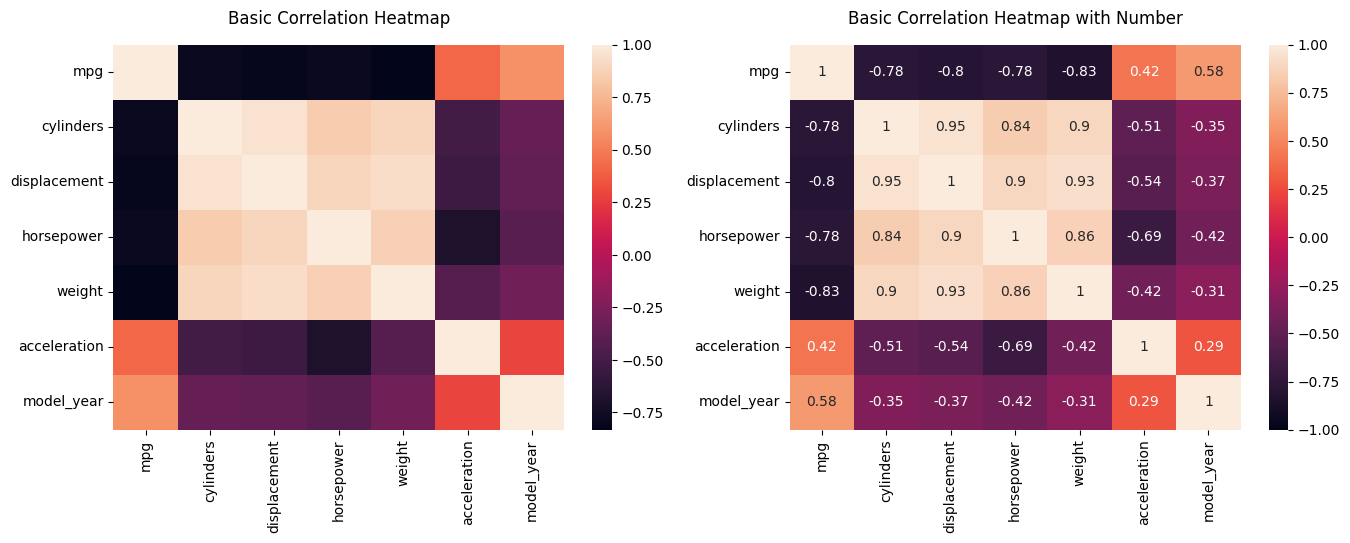

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic Correlation Heatmap', pad=15)

sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
ax[1].set_title('Basic Correlation Heatmap with Number', pad=15)

In [ ]:
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype=bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


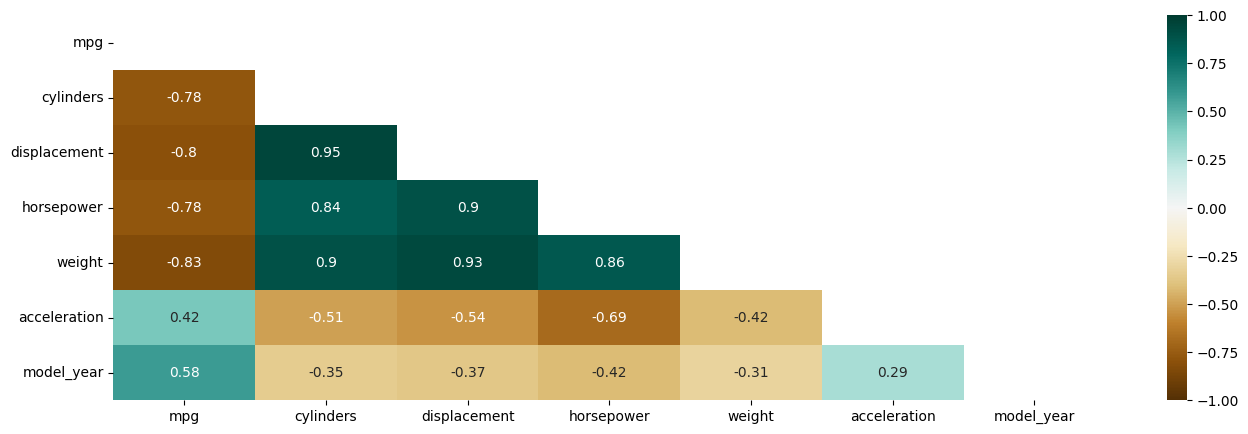

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))

ax = sns.heatmap(num_mpg.corr(), mask=mask, # mask 하면 위에 날라감 > 같은 히트맵이어도 가독성 올라감
                 vmin=-1, vmax=1,
                 annot=True,
                 cmap='BrBG', cbar=True)

# 중급 시각화

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import(MultipleLocator, AutoMinorLocator, FuncFormatter)  # Ticker: 축 눈금 / 축 눈금 미세조정하도록 클래스 존재
import seaborn as sns
import numpy as np

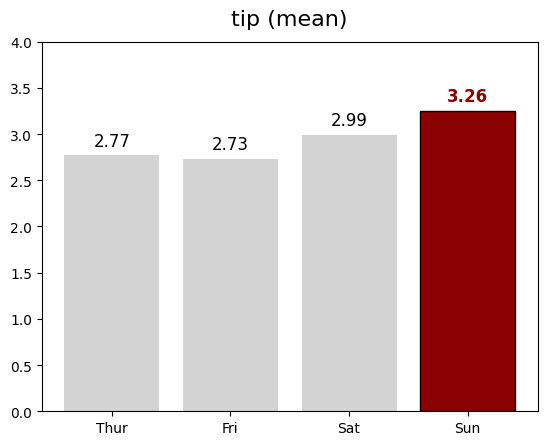

In [ ]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)
        # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

In [ ]:
def major_formatter(x, pos):
  return "{%.2f}"%x
formatter = FuncFormatter(major_formatter)

In [ ]:
tips = sns.load_dataset("tips")
tips_day=tips.groupby("day").mean().reset_index()
print(tips_day)

    day  total_bill       tip      size
0  Thur   17.682742  2.771452  2.451613
1   Fri   17.151579  2.734737  2.105263
2   Sat   20.441379  2.993103  2.517241
3   Sun   21.410000  3.255132  2.842105


<ipython-input-101-f29cbb8cf5f5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips_day=tips.groupby("day").mean().reset_index()


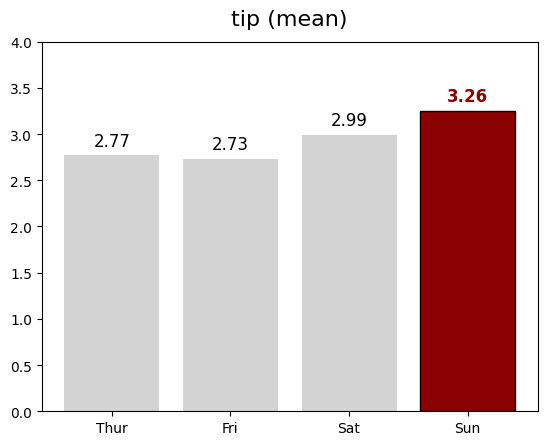

In [ ]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

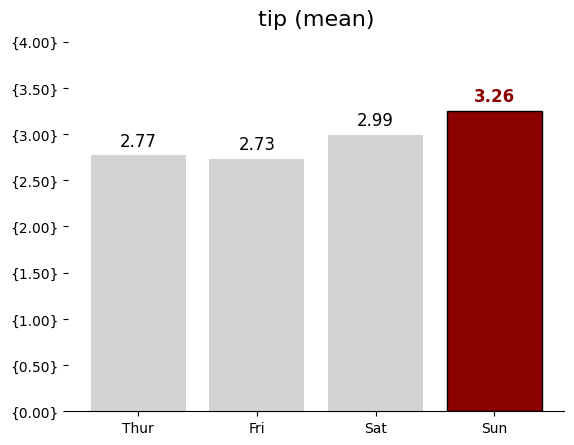

In [ ]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))  # y축 주요 눈금 위치 설정 간격 = 1
ax.yaxis.set_major_formatter(formatter)  # 주요 눈금의 형식 지정
ax.yaxis.set_major_locator(MultipleLocator(0.5)) # 이전에 설정한 주요 눈금 덮어쓰기

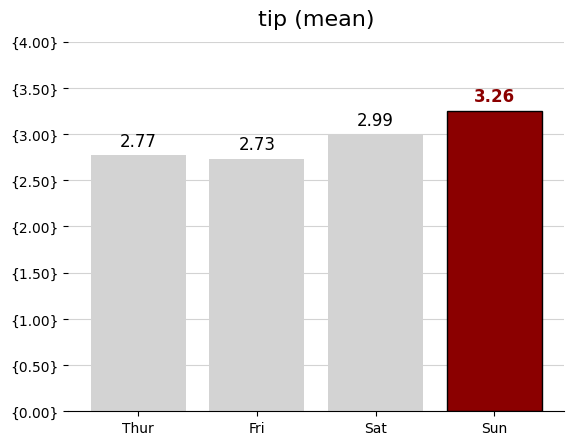

In [ ]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))  # y축 주요 눈금 위치 설정 간격 = 1
ax.yaxis.set_major_formatter(formatter)  # 주요 눈금의 형식 지정
ax.yaxis.set_major_locator(MultipleLocator(0.5)) # 이전에 설정한 주요 눈금 덮어쓰기

ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

<ipython-input-144-ea8100b24fe2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax0=sns.barplot(x="day", y="total_bill", data=tips,


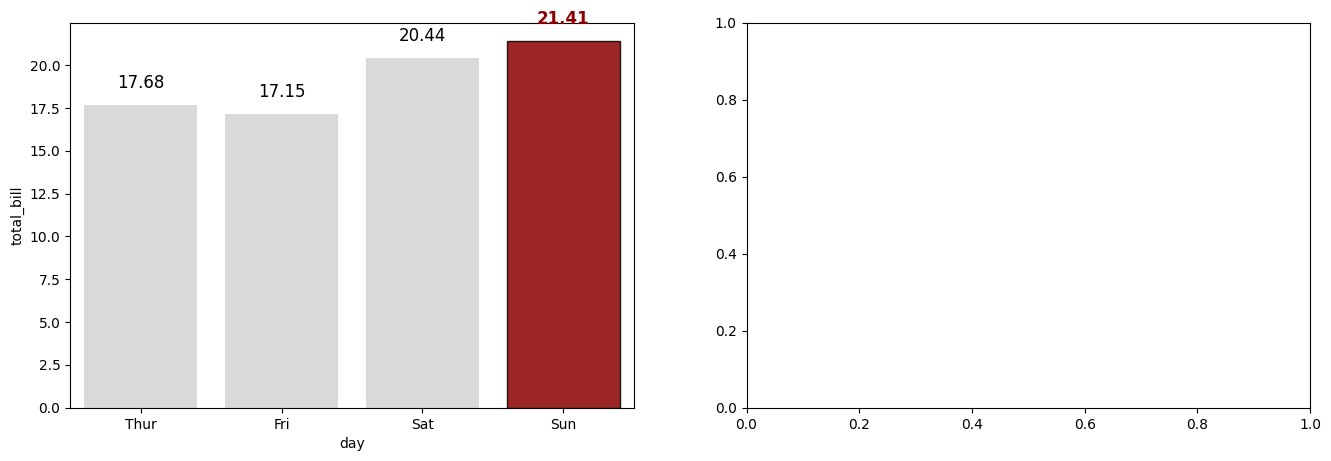

In [ ]:
tips=sns.load_dataset("tips")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Ideal Bar Graph
ax0=sns.barplot(x="day", y="total_bill", data=tips,
                ci=None, color='lightgray', alpha=0.85, zorder=2,
                ax=ax[0])

for p in ax0.patches:
  fontweight='normal'
  color='k'
  height=np.round(p.get_height(), 2)
  if h_mean==height:
    fontweight='bold'
    color='darkred'
    p.set_facecolor(color)
    p.set_edgecolor('black')
  ax0.text(p.get_x()+p.get_width()/2., height +1, height, ha='center', size=12, fontweight=fontweight, color=color)

fig.show()

In [ ]:
group_mean=tips.groupby(['day'])['total_bill'].agg('mean')
h_day=group_mean.sort_values(ascending=False).index[0]
h_mean=np.round(group_mean.sort_values(ascending=False)[0], 2)
print("The Best Day:", h_day)
print("The Highest Avg. Total Bill:",h_mean)

The Best Day: Sun
The Highest Avg. Total Bill: 21.41
